In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv("../data/census2011.csv")

In [30]:
df

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
5,7394750,E12000001,H,2,1,1,6,2,2,1,2,1,1,1,9,2,3,3
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
7,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,-9
8,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,2
9,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,4


# Refining the dataset

So this is how you write text, change it from "code" to "markdown" in the 
menu

In [31]:
#checks that no sections are empty, takes several seconds to run
def num_missing(x):
    return sum(x.isnull())
#print ("Missing values per column")
print (df.apply(num_missing, axis =0))

Person ID                    0
Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
Approximated Social Grade    0
dtype: int64


In [32]:
df['Region'].unique()

array(['E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
       'E12000009', 'E12000006', 'E12000008', 'E12000007', 'W92000004'], dtype=object)

In [33]:
df['Residence Type'].unique()

array(['H', 'C'], dtype=object)

In [34]:
df['Family Composition'].unique()

array([ 2,  5,  3,  1,  6, -9,  4])

In [39]:
len(df)

569741

In [40]:
df.dtypes

Person ID                     int64
Region                       object
Residence Type               object
Family Composition            int64
Population Base               int64
Sex                           int64
Age                           int64
Marital Status                int64
Student                       int64
Country of Birth              int64
Health                        int64
Ethnic Group                  int64
Religion                      int64
Economic Activity             int64
Occupation                    int64
Industry                      int64
Hours worked per week         int64
Approximated Social Grade     int64
Student_label                object
dtype: object

In [41]:
region_labels = {
    # Region from MicroDataTeachingVariables pdf
    'E12000001':'North East',
    'E12000002':'North West',
    'E12000003':'Yorkshire and the Humber',
    'E12000004':'East Midlands',
    'E12000005':'West Midlands',
    'E12000006':'East of England',
    'E12000007':'London',
    'E12000008':'South East',
    'E12000009':'South West',
    'W92000004':'Wales',
    
}

def region_label(version):
    return region_labels[version]

df['Region_label'] = df['Region'].map(region_label)

In [42]:
residence_type_labels = {
    # Residence labels from MicroDataTeachingVariables pdf
    'C':'Resident in a communal establishment',
    'H':'Not resident in a communal establishment',
}

def residence_type_label(version):
    return residence_type_labels[version]

df['Residence_type_label'] = df['Residence Type'].map(residence_type_label)

In [43]:
family_composition_labels = {
    # Family labels from MicroDataTeachingVariables pdf
    1:'Not in a family',
    2:'Married/same-sex civil partnership couple family',
    3:'Cohabiting couple family',
    4:'Lone parent family (male head)',
    5:'Lone parent family (female head)',
    6:'Other related family',
    -9:'No code required',
}

def family_composition_label(version):
    return family_composition_labels[version]

df['Family_Composition_label'] = df['Family Composition'].map(family_composition_label)

In [44]:
population_base_labels = {
    # Population base labels from MicroDataTeachingVariables pdf
    1:'Usual resident',
    2:'Student living away from home during term time',
    3:'Short-term resident',
}

def population_base_label(version):
    return population_base_labels[version]

df['Population_base_label'] = df['Population Base'].map(population_base_label)

In [45]:
sex_labels = {
    # Sex labels from MicroDataTeachingVariables pdf
    1:'Male',
    2:'Female',
}

def sex_label(version):
    return sex_labels[version]

df['Sex_label'] = df['Sex'].map(sex_label)

In [46]:
age_labels = {
    # Age labels from MicroDataTeachingVariables pdf
    1:'0 to 15',
    2:'16 to 24',
    3:'25 to 34',
    4:'35 to 44',
    5:'45 to 54',
    6:'55 to 64',
    7:'65 to 74',
    8:'74 and over',
}

def age_label(version):
    return age_labels[version]

df['Age_label'] = df['Age'].map(age_label)

In [47]:
marital_status_labels = {
    # Marital status labels from MicroDataTeachingVariables pdf
    1:'Single',
    2:'Married',
    3:'Separated',
    4:'Divorced',
    5:'Widowed',
}

def marital_status_label(version):
    return marital_status_labels[version]

df['Marital_status_label'] = df['Marital Status'].map(marital_status_label)

In [48]:
student_labels = {
    # Student labels from MicroDataTeachingVariables pdf
    1:'Yes',
    2:'No',
}

def student_label(version):
    return student_labels[version]

df['Student_label'] = df['Student'].map(student_label)

In [49]:
country_of_birth_labels = {
    # Country of birth labels from MicroDataTeachingVariables pdf
    1:'UK',
    2:'Non UK',
    -9:'No code required',
}

def country_of_birth_label(version):
    return country_of_birth_labels[version]

df['Country_of_birth_label'] = df['Country of Birth'].map(country_of_birth_label)

In [50]:
health_labels = {
    # Health labels from MicroDataTeachingVariables pdf
    1:'Very good health',
    2:'Good health',
    3:'Fair health',
    4:'Bad health',
    5:'Very bad health',
    -9:'No code required',
}

def health_label(version):
    return health_labels[version]

df['Health_label'] = df['Health'].map(health_label)

In [51]:
ethnic_group_labels = {
    # Ethnic group labels from MicroDataTeachingVariables pdf
    1:'White',
    2:'Mixed',
    3:'Asian or Asian British',
    4:'Black or Black British',
    5:'Chinese or other ethnic group',
    -9:'No code required',
}

def ethnic_group_label(version):
    return ethnic_group_labels[version]

df['Ethnic_group_label'] = df['Ethnic Group'].map(ethnic_group_label)

In [52]:
religion_labels = {
    # Religion labels from MicroDataTeachingVariables pdf
    1:'No religion',
    2:'Christian',
    3:'Buddhist',
    4:'Hindu',
    5:'Jewish',
    6:'Muslim',
    7:'Sikh',
    8:'Other religion',
    9:'Not stated',
    -9:'No code required',
}

def religion_label(version):
    return religion_labels[version]

df['Religion_label'] = df['Religion'].map(religion_label)

In [53]:
economic_activity_labels = {
    # Economic activity labels from MicroDataTeachingVariables pdf
    1:'Economically active: Employee',
    2:'Economically active: Self-employed',
    3:'Economically active: Unemployed',
    4:'Economically active: Full-time student',
    5:'Economically inactive: Retired',
    6:'Economically inactive: Student',
    7:'Economically inactive: Looking after home or family',
    8:'Economically inactive: Long-term sick or disabled',
    9:'Economically inactive: Other',
    -9:'No code required',
}

def economic_activity_label(version):
    return economic_activity_labels[version]

df['Economic_activity_label'] = df['Economic Activity'].map(economic_activity_label)

In [54]:
occupation_labels = {
    # Occupation labels from MicroDataTeachingVariables pdf
    1:'Managers, Directors and Senior Officials',
    2:'Professional Occupations',
    3:'Associate Professional and Technical Occupations',
    4:'Administrative and Secretarial Occupations',
    5:'Skilled Trades Occupations',
    6:'Caring, Leisure and Other Service',
    7:'Sales and Customer Service Occupations',
    8:'Process, Plant and Machine Operatives',
    9:'Elementary Occupations',
    -9:'No code required',
}

def occupation_label(version):
    return occupation_labels[version]

df['Occupation_label'] = df['Occupation'].map(occupation_label)

In [55]:
industry_labels = {
    # industry labels from MicroDataTeachingVariables pdf
    1:'Agriculture, forestry and fishing',
    2:'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply',
    3:'Construction',
    4:'Wholesale and retail trade; Repair of motor vechiles and motorcycles',
    5:'Accommodation and food service activities',
    6:'Transport and storage; Information and communication',
    7:'Financial and insurance activities; Intermediation',
    8:'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities',
    9:'Public administration and defence; compulsory social security',
    10:'Education',
    11:'Human health and social work activities',
    12:'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies',
    -9:'No code required',
}

def industry_label(version):
    return industry_labels[version]

df['Industry_label'] = df['Industry'].map(industry_label)

In [56]:
hours_worked_per_week_labels = {
    # Hours worked per week labels from MicroDataTeachingVariables pdf
    1:'Part-time: 15 or less hours worked',
    2:'Part-time: 16 to 30 hours worked',
    3:'Full-time: 31 to 48 hours worked',
    4:'Full-time: 49 or more hours worked',
    -9:'No code required',
}

def hours_worked_per_week_label(version):
    return hours_worked_per_week_labels[version]

df['Hours_worked_per_week_label'] = df['Hours worked per week'].map(hours_worked_per_week_label)

In [57]:
approximated_social_grade_labels = {
    # Approximated social grade labels from MicroDataTeachingVariables pdf
    1:'AB',
    2:'C1',
    3:'C2',
    4:'DE',
    -9:'No code required',
}

def approximated_social_grade_label(version):
    return approximated_social_grade_labels[version]

df['Approximated_social_grade_label'] = df['Approximated Social Grade'].map(approximated_social_grade_label)

In [58]:
df.groupby('Region_label').size()
#df['Region'].unique()

Region_label
East Midlands               45782
East of England             59411
London                      83582
North East                  26349
North West                  71436
South East                  88084
South West                  53774
Wales                       30977
West Midlands               56875
Yorkshire and the Humber    53471
dtype: int64

In [59]:
df.groupby('Residence_type_label').size()

Residence_type_label
Not resident in a communal establishment    559087
Resident in a communal establishment         10654
dtype: int64

In [60]:
df.groupby('Family_Composition_label').size()

Family_Composition_label
Cohabiting couple family                             72641
Lone parent family (female head)                     64519
Lone parent family (male head)                        9848
Married/same-sex civil partnership couple family    300962
No code required                                     18851
Not in a family                                      96690
Other related family                                  6230
dtype: int64

In [61]:
df.groupby('Population_base_label').size()

Population_base_label
Short-term resident                                 1971
Student living away from home during term time      6730
Usual resident                                    561040
dtype: int64

In [62]:
df.groupby('Sex_label').size()

Sex_label
Female    289172
Male      280569
dtype: int64

In [63]:
df.groupby('Age_label').size()

Age_label
0 to 15        106832
16 to 24        72785
25 to 34        75948
35 to 44        78641
45 to 54        77388
55 to 64        65666
65 to 74        48777
74 and over     43704
dtype: int64

In [64]:
df.groupby('Marital_status_label').size()

Marital_status_label
Divorced      40713
Married      214180
Separated     11951
Single       270999
Widowed       31898
dtype: int64

In [65]:
df.groupby('Student_label').size()

Student_label
No     443204
Yes    126537
dtype: int64

In [66]:
df.groupby('Country_of_birth_label').size()

Country_of_birth_label
No code required      6804
Non UK               77292
UK                  485645
dtype: int64

In [67]:
df.groupby('Health_label').size()

Health_label
Bad health           24558
Fair health          74480
Good health         191744
No code required      6804
Very bad health       7184
Very good health    264971
dtype: int64

In [68]:
df.groupby('Ethnic_group_label').size()

Ethnic_group_label
Asian or Asian British            42712
Black or Black British            18786
Chinese or other ethnic group      5753
Mixed                             12209
No code required                   6804
White                            483477
dtype: int64

In [69]:
df.groupby('Religion_label').size()

Religion_label
Buddhist              2538
Christian           333481
Hindu                 8214
Jewish                2572
Muslim               27240
No code required      6804
No religion         141658
Not stated           40613
Other religion        2406
Sikh                  4215
dtype: int64

In [70]:
df.groupby('Economic_activity_label').size()

Economic_activity_label
Economically active: Employee                          216025
Economically active: Full-time student                  14117
Economically active: Self-employed                      40632
Economically active: Unemployed                         18109
Economically inactive: Long-term sick or disabled       17991
Economically inactive: Looking after home or family     17945
Economically inactive: Other                            10068
Economically inactive: Retired                          97480
Economically inactive: Student                          24756
No code required                                       112618
dtype: int64

In [71]:
df.groupby('Occupation_label').size()

Occupation_label
Administrative and Secretarial Occupations           53254
Associate Professional and Technical Occupations     44937
Caring, Leisure and Other Service                    37297
Elementary Occupations                               58483
Managers, Directors and Senior Officials             39788
No code required                                    149984
Process, Plant and Machine Operatives                34818
Professional Occupations                             64111
Sales and Customer Service Occupations               38523
Skilled Trades Occupations                           48546
dtype: int64

In [72]:
df.groupby('Industry_label').size()

Industry_label
Accommodation and food service activities                                                                                                            25736
Agriculture, forestry and fishing                                                                                                                     3957
Construction                                                                                                                                         30708
Education                                                                                                                                            40560
Financial and insurance activities; Intermediation                                                                                                   16776
Human health and social work activities                                                                                                              49345
Mining and quarrying; Manufacturing; Electricity, gas, 

In [73]:
df.groupby('Hours_worked_per_week_label').size()

Hours_worked_per_week_label
Full-time: 31 to 48 hours worked      153938
Full-time: 49 or more hours worked     35573
No code required                      302321
Part-time: 15 or less hours worked     25776
Part-time: 16 to 30 hours worked       52133
dtype: int64

In [74]:
df.groupby('Approximated_social_grade_label').size()

Approximated_social_grade_label
AB                   82320
C1                  159642
C2                   79936
DE                  123740
No code required    124103
dtype: int64

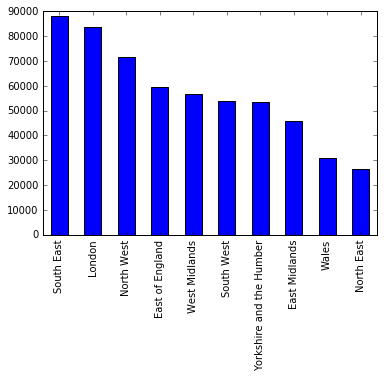

In [75]:
df['Region_label'].value_counts().plot(kind="bar")

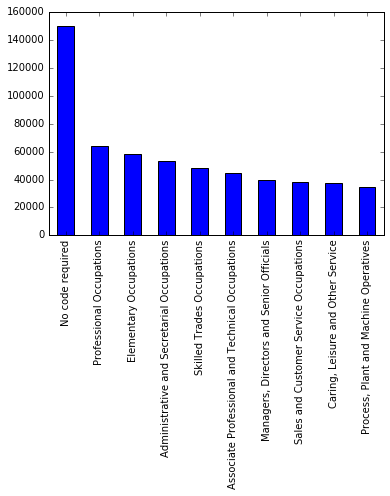

In [76]:
df['Occupation_label'].value_counts().plot(kind="bar")

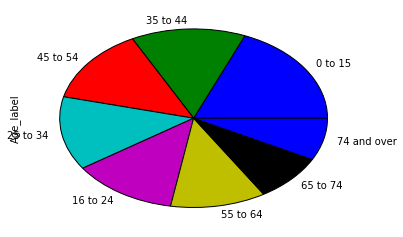

In [77]:
df['Age_label'].value_counts().plot(kind="pie")

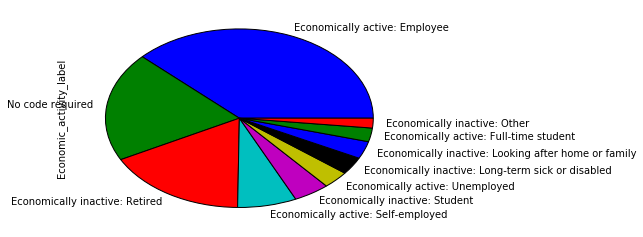

In [78]:
df['Economic_activity_label'].value_counts().plot(kind="pie")

In [90]:
df.groupby(['Region_label', 'Industry_label']).size()


Region_label              Industry_label                                                                                                                                  
East Midlands             Accommodation and food service activities                                                                                                            1936
                          Agriculture, forestry and fishing                                                                                                                     429
                          Construction                                                                                                                                         2500
                          Education                                                                                                                                            3280
                          Financial and insurance activities; Intermediation                                 